
# Project: Investigating the FBI Gun Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    
<li><a href="#conclusions">Conclusions</a></li>
    <ul>
        <li><a href="#limit">Limitations</a></li>
    </ul>
</ul>

# <a id='intro'></a>
# Introduction

> The dataset used in this notebook is the FBI Gun Datasets, which include two dataset, one is a number of background checks from FBI upon any gun purchases, the other one is a Census Data including various census related variables.

> The FBI Gun data inclues a range of different background check types, to name a few, 'permit', 'permit_recheck', 'handgun', 'long_gun', 'multiple'(purchasing more than one gun per background check). For each month, each state, there's a data point consisting all the above mentioned variables. Among all the variables, only the 'totals' variable will be used here, which means the total number of all the various background checks in each state and month.



* Dependent Variable: the 'totals' variable in gun data.
* Independent Variables: all the numerical variable in census dataset

### Questions to answer:
**1. Which state has the max sale in july 2016 with respect to population.**

**2. which country has max private sale**

**3. Is there a seasonal pattern for firearm shopping?** 

In [132]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

us = pd.read_csv("U.S. Census Data.csv")
gun=pd.read_csv("gun_data.csv")
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [133]:
us.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"48,63,300","7,41,894","69,31,071","29,88,248","3,92,50,017","55,40,545","35,76,452","9,52,065",...,865454,6651194,"2,78,62,596","30,51,217","6,24,594","84,11,808","72,88,000","18,31,102","57,78,708","5,85,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"47,80,131","7,10,249","63,92,301","29,16,025","3,72,54,522","50,29,324","35,74,114","8,97,936",...,814195,6346298,"2,51,46,100","27,63,888","6,25,741","80,01,041","67,24,545","18,53,011","56,87,289","5,63,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [134]:
gun.rename(columns= lambda x: x.strip().lower().replace(" ", "_"), inplace= True)


In [135]:
us.rename(columns= lambda x: x.strip().lower().replace(" ", "_"), inplace= True)  #chamge into lower case so that we can delete fact note
us.drop('fact_note', axis=1, inplace=True)
us.head(1)

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)","48,63,300","7,41,894","69,31,071","29,88,248","3,92,50,017","55,40,545","35,76,452","9,52,065","2,06,12,439",...,865454,6651194,"2,78,62,596","30,51,217","6,24,594","84,11,808","72,88,000","18,31,102","57,78,708","5,85,501"


# <a id='wrangling'></a>
# Data Wrangling




Dropping the null values 

In [136]:
us.isnull().sum()
us.dropna(inplace=True)



In [137]:
us.isnull().sum().any()


False

Saving it to different file

In [138]:
us.to_csv("us_e2.csv", index=False)
us=pd.read_csv("us_e2.csv")

In [139]:
d_2016_07=gun.query('month== "2016-07"')
d_2016_07.shape

(55, 27)

In [140]:
d_2016_07.isnull().sum()


month                         0
state                         0
permit                        0
permit_recheck                0
handgun                       0
long_gun                      0
other                         0
multiple                      0
admin                         0
prepawn_handgun               0
prepawn_long_gun              0
prepawn_other                 0
redemption_handgun            0
redemption_long_gun           0
redemption_other              0
returned_handgun              0
returned_long_gun             0
returned_other                0
rentals_handgun              55
rentals_long_gun             55
private_sale_handgun          0
private_sale_long_gun         0
private_sale_other            0
return_to_seller_handgun      0
return_to_seller_long_gun     0
return_to_seller_other        0
totals                        0
dtype: int64

In [141]:
d_2016_07.drop(["rentals_handgun","rentals_long_gun"], axis=1, inplace=True)  #droping the columns


c:\users\shiwali singh\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [142]:
d_2016_07.shape
d_2016_07.isnull().sum().any()


False

In [143]:
us.rename(columns= lambda x: x.strip().lower().replace("_", " "), inplace= True) #we have to remove _ from names 
us.head(1)

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)","48,63,300","7,41,894","69,31,071","29,88,248","3,92,50,017","55,40,545","35,76,452","9,52,065","2,06,12,439",...,865454,6651194,"2,78,62,596","30,51,217","6,24,594","84,11,808","72,88,000","18,31,102","57,78,708","5,85,501"


In [144]:
a=us.T   #taking transpose its comfortable to read data
a.to_csv("us_t.csv")

In [145]:
us=pd.read_csv('us_t.csv', header=1)
us= us.rename(columns= {"fact" : "state"})


In [146]:
us.rename(columns= lambda x: x.strip().lower().replace(" ", "_"), inplace= True) 
us.to_csv("us_new.csv", index=False)
us=pd.read_csv('us_new.csv')
us.head()

,state,"population_estimates,_july_1,_2016,__(v2016)","population_estimates_base,_april_1,_2010,__(v2016)","population,_percent_change_-_april_1,_2010_(estimates_base)_to_july_1,_2016,__(v2016)","population,_census,_april_1,_2010","persons_under_5_years,_percent,_july_1,_2016,__(v2016)","persons_under_5_years,_percent,_april_1,_2010","persons_under_18_years,_percent,_july_1,_2016,__(v2016)","persons_under_18_years,_percent,_april_1,_2010","persons_65_years_and_over,_percent,__july_1,_2016,__(v2016)",...,"all_firms,_2012","men-owned_firms,_2012","women-owned_firms,_2012","minority-owned_firms,_2012","nonminority-owned_firms,_2012","veteran-owned_firms,_2012","nonveteran-owned_firms,_2012","population_per_square_mile,_2010","land_area_in_square_miles,_2010",fips_code
0,alabama,"48,63,300","47,80,131",1.70%,"47,79,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"3,74,153","2,03,604","1,37,630","92,219","2,72,651","41,943","3,16,984",94.4,"50,645.33","""01"""
1,alaska,"7,41,894","7,10,249",4.50%,"7,10,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"5,70,640.95","""02"""
2,arizona,"69,31,071","63,92,301",8.40%,"63,92,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"4,99,926","2,45,243","1,82,425","1,35,313","3,44,981","46,780","4,27,582",56.3,"1,13,594.08","""04"""
3,arkansas,"29,88,248","29,16,025",2.50%,"29,15,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"2,31,959","1,23,158","75,962","35,982","1,89,029","25,915","1,92,988",56,"52,035.48","""05"""
4,california,"3,92,50,017","3,72,54,522",5.40%,"3,72,53,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"35,48,449","18,52,580","13,20,085","16,19,857","18,19,107","2,52,377","31,76,341",239.1,"1,55,779.22","""06"""


In [147]:
us["state"]= us["state"].str.title() #making all the names starting in capital so that it can match the gun dataset


In [148]:
d_2016_07["state"].equals(us["state"])  #we have to make them equal 
d_2016_07.query('state not in @us.state')
d_2016_07.drop(([778,781,791,811,819]), axis=0, inplace=True) #deleting all the diffrent values


In [149]:
d_2016_07.query('state not in @us.state')


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_handgun,returned_long_gun,returned_other,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals


changing the datatypes 

In [150]:
us["population_estimates,_july_1,_2016,__(v2016)"]=us["population_estimates,_july_1,_2016,__(v2016)"].str.replace(',', '').astype('int64').copy()


In [151]:
a=us["population_estimates,_july_1,_2016,__(v2016)"]
b= d_2016_07["state"]


<a id='eda'></a>
# Exploratory Data Analysis

### Q1. Which state has the max sale in july 2016 wrt population

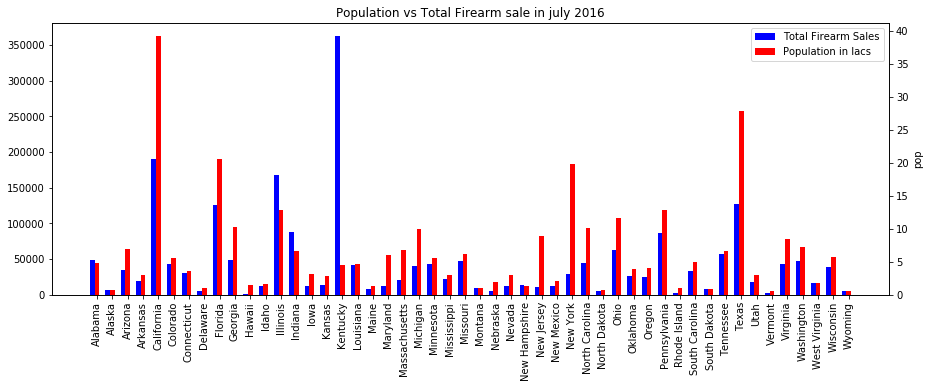

In [152]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)

x = np.arange(50)
w=0.3
plt.xticks(x + w /2, d_2016_07["state"], rotation='vertical')
total_sale =ax.bar(x, d_2016_07["totals"], width=w, color='b', align='center')

ax1 = ax.twinx()

heights = us["population_estimates,_july_1,_2016,__(v2016)"]
population=ax1.bar(x+w , heights/10**6, tick_label=us["state"],width=w, color='r', align='center')

plt.title('Population vs Total Firearm sale in july 2016')
plt.xlabel('States')
plt.ylabel('pop')
plt.legend([total_sale, population],['Total Firearm Sales','Population in lacs'])

plt.show()

### Q2. which country has max private sale

In [153]:
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [154]:
df_private=gun.iloc[:,[0,1,20,21,22]]

Adding up all the private sales

In [155]:
df_private["Total_private_sale"]= df_private.apply(lambda row: row['private_sale_handgun']+ row['private_sale_long_gun']+row["private_sale_other"], axis=1)

c:\users\shiwali singh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
df_private.head(3)

,month,state,private_sale_handgun,private_sale_long_gun,private_sale_other,Total_private_sale
0,2017-09,Alabama,9.0,16.0,3.0,28.0
1,2017-09,Alaska,17.0,24.0,1.0,42.0
2,2017-09,Arizona,38.0,12.0,2.0,52.0


In [157]:
df_private.dropna(inplace=True)

c:\users\shiwali singh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
df_new=df_private.query("month == '2015-11'")

In [159]:
df_new.shape

(55, 6)

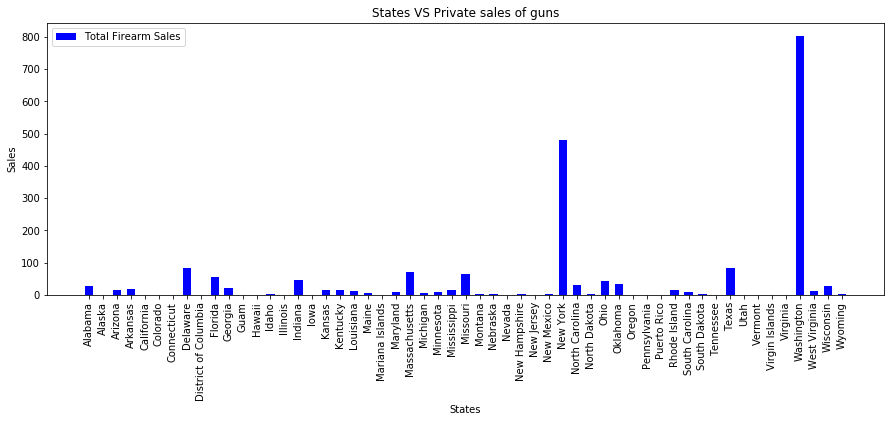

In [160]:
fig= plt.figure(figsize=(15,5))
x = np.arange(55)

plt.xticks(x , df_new["state"], rotation='vertical')
total_sale =plt.bar(x, df_new["Total_private_sale"], width=0.6, color='b', align='center')

plt.title('States VS Private sales of guns')
plt.xlabel('States')
plt.ylabel('Sales')
plt.legend([total_sale],['Total Firearm Sales'])
plt.show()


### Q.3 Is there a seasonal pattern for firearm shopping?

#### Let's first group and sum all states' 'totals' column by 'month'

In [161]:
all_df_gun_totals = gun[['month','totals']]

In [162]:
all_df_gun_totals.set_index('month',inplace=True)

In [163]:
all_df_gun_totals=all_df_gun_totals[::-1]

In [164]:
gun_totals_groupby_month = all_df_gun_totals.groupby('month').sum()

In [165]:
gun_totals_groupby_month.head()

,totals
month,
1998-11,21176
1998-12,870722
1999-01,585974
1999-02,690215
1999-03,741687


Text(0.5, 0, '# Background Checks')

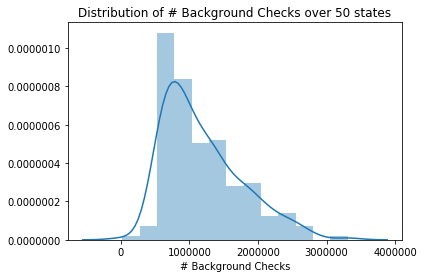

In [166]:
ax = sns.distplot(gun_totals_groupby_month)
ax.set_title('Distribution of # Background Checks over 50 states')
ax.set_xlabel('# Background Checks')

Clearly, it's a slightly left-skewed distribution

Text(0.5, 0, '#Background Checks')

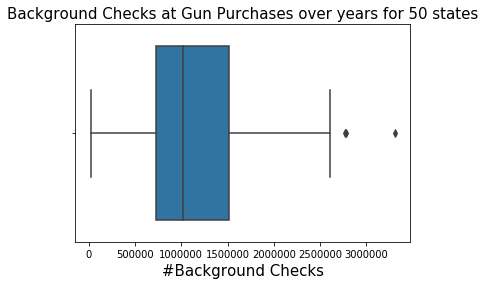

In [167]:
ax = sns.boxplot(gun_totals_groupby_month)
ax.set_title('Background Checks at Gun Purchases over years for 50 states', fontsize=15)
ax.set_xlabel('#Background Checks', fontsize=15)


[]

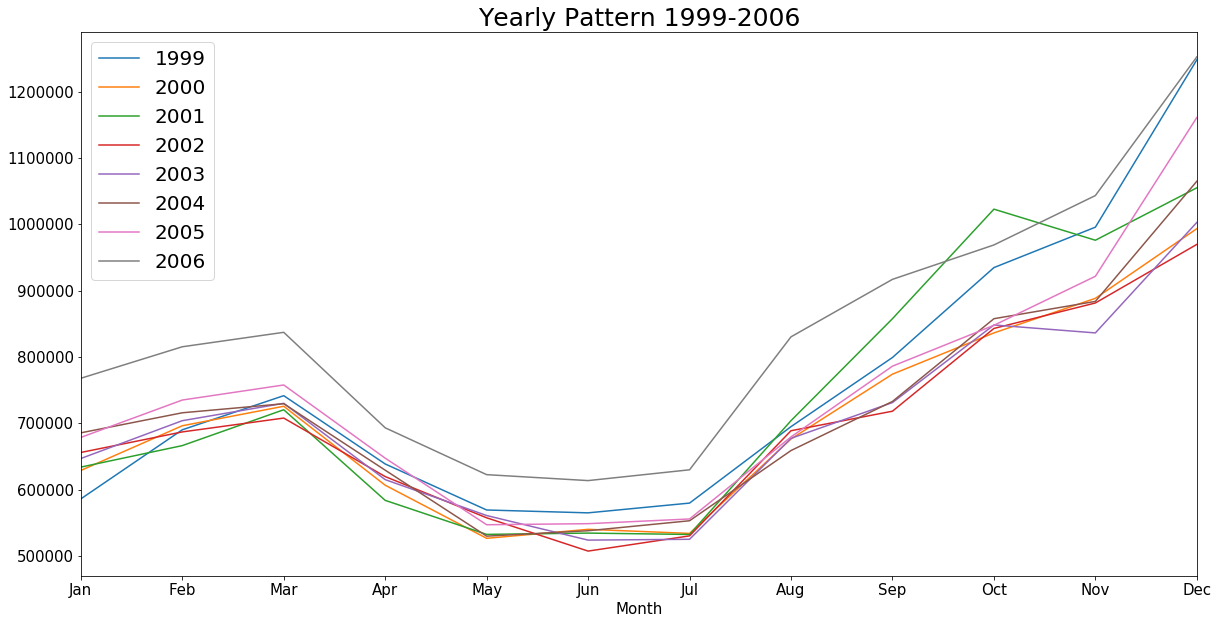

In [168]:
ax = gun_totals_groupby_month.loc['1999':'2000'].plot(figsize=(20,10),fontsize=15) #add the year 1999's plot first
legend =['1999']
for i in range(2000,2007): #excluding 1998 and 2017, for they are not complete
    ax = gun_totals_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=20)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),fontdict={
     'fontsize': 15,
     'fontweight': 15})
ax.set_title('Yearly Pattern 1999-2006', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.plot()

[]

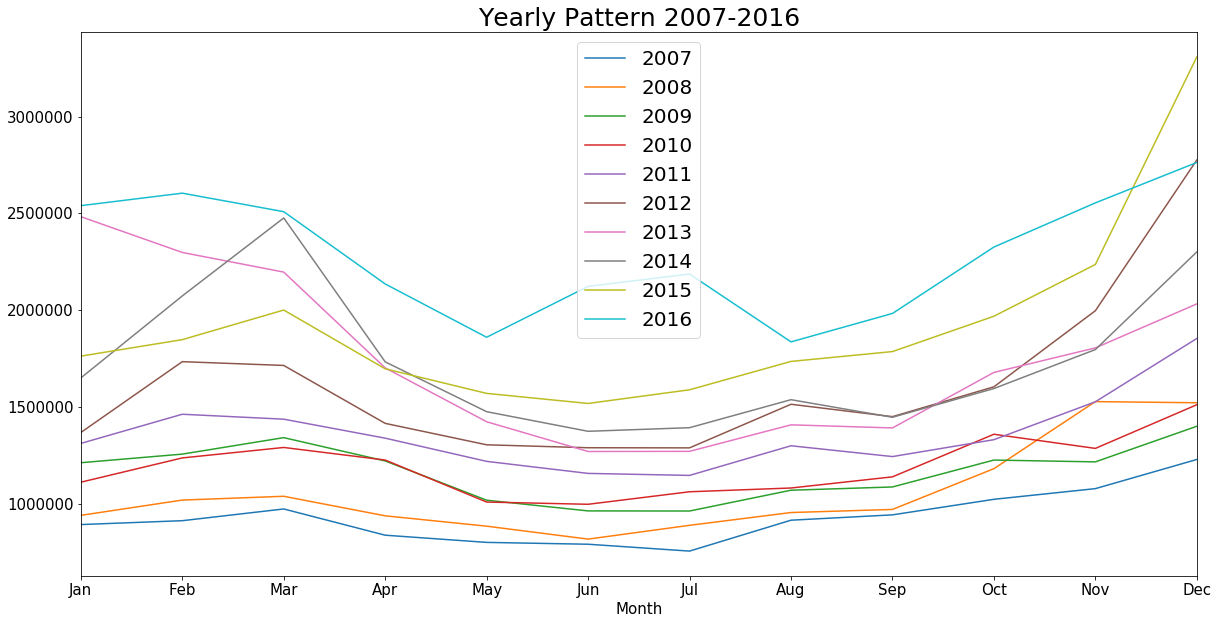

In [169]:
ax = gun_totals_groupby_month.loc['2007':'2008'].plot(figsize=(20,10),fontsize=15) #add the year 1999's plot first
legend =['2007']
for i in range(2008,2017): #excluding 1998 and 2017, for they are not complete
    ax = gun_totals_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=20)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']),fontdict={
     'fontsize': 15,
     'fontweight': 15})
ax.set_title('Yearly Pattern 2007-2016', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.plot()

<a id='conclusions'></a>
# Conclusions


With the exploration and statistical tests performed above, we can answer the questions raised at the begginning of this notebook, with limitation :
#### 1. Which state has the max sale in july 2016 with respect to population?

>The max sales according to the population of states in been observed in kentucky. More people are buying guns as compare to other states  


#### 2- Which country has max private sale?
> The country which has the max sales in 2015 November  that is black friday month is in washinton 


#### 3 - Is there a seasonal pattern for firearm shopping? 

> Yes. From the year-to-year analysis from 1999 and 2016 of all the states, there's a clear pattern that the number stays low in the summer and peaks in the winter. There's a little inconsistency during the summer of 2016, which we need to research further into what happened before or during that summer.